<a href="https://colab.research.google.com/github/YashBelliappa-10/PRODIGY_ML/blob/main/ML_Task1_Prices_of_houses_based_on_their_square_footage_and_the_number_of_bedrooms_and_bathrooms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error : 2806426667.247853
R-squared : 0.6341189942328371
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-nu

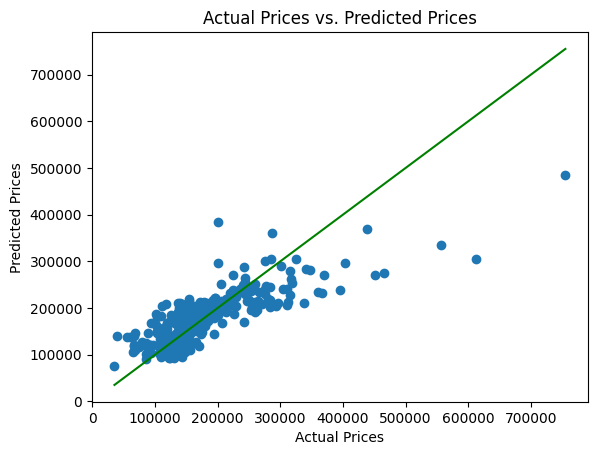

"new_Data = pd.DataFrame({'GrLivArea': [2000], 'BedroomAbvGr':[3], 'FullBath': [2]}) # Corrected column names\npredicted_Price = model.predict(new_Data)\nprint(f'Predicted Price: {predicted_Price[0]}')\n\npredicted_test_Price = model.predict(test_data[['GrLivArea','BedroomAbvGr','FullBath']])\n# Predict prices for all rows in test_data\n\noutput = pd.DataFrame({'Id': test_data.index, 'Predicted Price': predicted_test_Price})\noutput.to_csv('prediction_result.csv', index=False)"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score # Import mean_squared_error

# Step 1: Load the data
# test_data = pd.read_csv('/content/PRICE_HOUSE_SQF_BEDROOM_AND_BATHROOM/test.csv')

train_data = pd.read_csv('/content/PRICE_HOUSE_SQF_BEDROOM_AND_BATHROOM/train.csv')

# Step 2: Preprocess the data
# Check for and handle missing values in 'GrLivArea', 'BedroomAbvGr', 'FullBath', and 'SalePrice' columns
train_data = train_data.dropna(subset=['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice'])

# Step 3: Feature selection
features = ["GrLivArea", "BedroomAbvGr", "FullBath"]
X = train_data[features]
y = train_data['SalePrice']

# Check if X and y have data before splitting
if X.empty or y.empty:
    print("Error: Input data is empty. Check data loading and preprocessing steps.")
else:
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred) # Use mean_squared_error
    r2 = r2_score(y_test, y_pred)
    print(f'Mean Squared Error : {mse}')
    print(f'R-squared : {r2}')

#train_data.head()
# data.shape
train_data.info()

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green') #Identity line
plt.show()

"""new_Data = pd.DataFrame({'GrLivArea': [2000], 'BedroomAbvGr':[3], 'FullBath': [2]}) # Corrected column names
predicted_Price = model.predict(new_Data)
print(f'Predicted Price: {predicted_Price[0]}')

predicted_test_Price = model.predict(test_data[['GrLivArea','BedroomAbvGr','FullBath']])
# Predict prices for all rows in test_data

output = pd.DataFrame({'Id': test_data.index, 'Predicted Price': predicted_test_Price})
output.to_csv('prediction_result.csv', index=False)"""